In [4]:
#In this data set, I'm going to use the data to predict if the patient has diabetes or not #

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [7]:
# Dataset is saved in CSV file
dataD = pd.read_csv('diabetes.csv')

In [8]:
# Display the top 3 samples
dataD.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [9]:
dataD.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
dataD.shape

(768, 9)

In [12]:
dataD.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
# Identify NaN values
print(dataD.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
dataD.dropna()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
dataD.shape

(768, 9)

#In the data of exploring the features and variables, there are seven features: pregnancy glucose, blood pressure, skin thickness, insulin, BMI, diabetes, function and age. I've also identified the target classifier, which is the outcome which indicates if the person has diabetes or not# 


In [17]:
#get features and store in X 
#get targets and store in y
X = dataD.iloc[:, :-1].values
y = dataD.iloc[:, -1].values


In [18]:
# Assuming y_test is already defined
unique, counts = np.unique(y, return_counts=True)
count_dict = dict(zip(unique, counts))

print("Number of instances in y")
print(count_dict)

Number of instances in y
{0: 500, 1: 268}


In [19]:
#split the train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

In [20]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
XS = sc.fit_transform(X)


In [21]:
print("TRAIN",X_train)
print("TEST",X_test)
print("ALL",XS)

TRAIN [[ 0.65819468 -0.58312425  0.68772819 ... -0.12132433 -0.89062719
   0.2463208 ]
 [-0.24090446  0.88165203 -0.11864624 ...  0.08449823 -0.66148763
  -0.94523944]
 [ 1.85699352  0.14926389  0.08294737 ... -0.0850027  -0.81525234
   0.67187803]
 ...
 [ 0.65819468 -0.42390944  0.99011861 ...  0.60510823  0.75857463
  -0.17923643]
 [-0.54060417 -1.44288425 -0.21944304 ... -0.25450363 -0.31777829
  -0.00901354]
 [-0.54060417 -0.42390944  0.28454098 ...  0.21767753 -0.21526849
  -0.86012799]]
TEST [[-0.85927999 -0.67623164 -0.30500193 ... -0.08579889 -0.05257498
   0.71080635]
 [ 1.45625346 -1.96055841  0.49173781 ...  0.03588818 -1.109707
   0.62572229]
 [-1.14872167 -0.67623164 -0.07736201 ... -0.26832948  0.41219858
  -1.07595873]
 ...
 [ 1.45625346 -0.31781487  0.60555778 ...  0.24884054 -0.61151834
   0.20030204]
 [-0.56983831 -0.70609971 -0.07736201 ... -1.85026131 -0.68746174
  -0.56545442]
 [-0.85927999 -0.16847455 -0.64646182 ...  0.18799701  0.01425521
  -0.56545442]]
ALL [[ 

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca)

[[-0.95413052  1.26828516]
 [-0.26067826 -0.4724725 ]
 [ 0.53082638  1.46604264]
 ...
 [-0.13276654  0.83738071]
 [-0.90971693 -0.56169816]
 [ 0.06311682 -1.13387975]]


In [23]:
# Scale the PCA-transformed data 
sc = StandardScaler() 
X_train_pca = sc.fit_transform(X_train_pca) 
X_test_pca = sc.transform(X_test_pca)

In [25]:
#training the logstic regressions modles 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifierlog = LogisticRegression(random_state = 0)
classifierlog.fit(X_train_pca, y_train)

classifierknn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifierknn.fit(X_train_pca, y_train)

classifiersvc = SVC(kernel = 'linear', random_state = 0)
classifiersvc.fit(X_train_pca, y_train)


classifiersv2 = SVC(kernel = 'rbf', random_state = 0)
classifiersv2.fit(X_train_pca, y_train)

classifiernb = GaussianNB()
classifiernb.fit(X_train_pca, y_train)

classifierdt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierdt.fit(X_train_pca, y_train)

classifierrfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierrfc.fit(X_train_pca, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
names=['not diabetes','diabetes']

In [27]:
from sklearn.model_selection import StratifiedKFold
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
cvscores = []
for train, test in kfold.split(X, y):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['recall'])
    ann.fit(X[train],y[train] ,batch_size = 16, epochs = 40)
    # evaluate the model	
    scores = ann.evaluate(X[test], y[test], verbose=0)
    print("%s: %.2f%%" % (ann.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


Epoch 1/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3085 - recall: 0.1753
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8215 - recall: 0.0651
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7480 - recall: 0.0534
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7078 - recall: 0.0414    
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6853 - recall: 0.0959
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6589 - recall: 0.0411   
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6573 - recall: 0.0463
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6639 - recall: 0.0365    
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6534 - recall: 0.0361
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6511 - recall: 0.0527
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6568 - recall: 0.0162   
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6440 - recall: 0.0042

In [28]:
from xgboost import XGBClassifier
classifierxg = XGBClassifier()
classifierxg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
print(y_test)
import numpy as np

# Assuming y_test is already defined
unique, counts = np.unique(y_test, return_counts=True)
count_dict = dict(zip(unique, counts))

print("Number of instances in y_test:")
print(count_dict)


[0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 0]
Number of instances in y_test:
{0: 126, 1: 66}





Logistic Regression Evalaion 

Logistic Regression Report

In [47]:
#Logistic Regression (Test set)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#predicts classifiers 
#creats a report
y_pred_log = classifierlog.predict(X_test_pca)
print(classification_report(y_test, y_pred_log,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.77      0.86      0.81       126
    diabetes       0.65      0.52      0.58        66

    accuracy                           0.74       192
   macro avg       0.71      0.69      0.69       192
weighted avg       0.73      0.74      0.73       192



Logistic Regression Matrix

[[108  18]
 [ 32  34]]


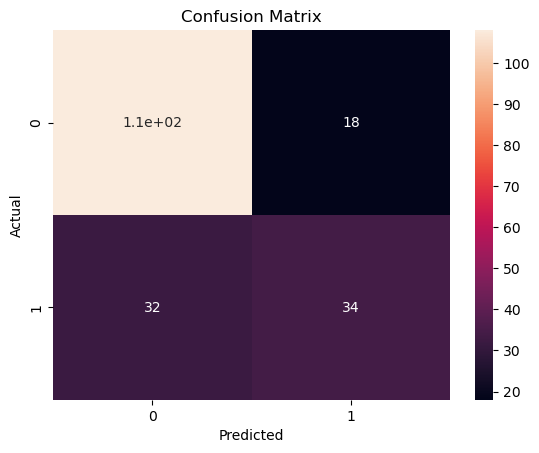

In [174]:
# create a matrix
confusion1 = confusion_matrix(y_test, y_pred_log)
confusion_df = pd.DataFrame(confusion1, index=range(2),columns=range(2)
                           )
import seaborn as sns
print(confusion1)


axes = sns.heatmap(confusion_df, annot=True,)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix")
plt.show()



Logistic Regression Visulizer

C:\Users\lokes\AppData\Local\Temp\ipykernel_8744\1231509991.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


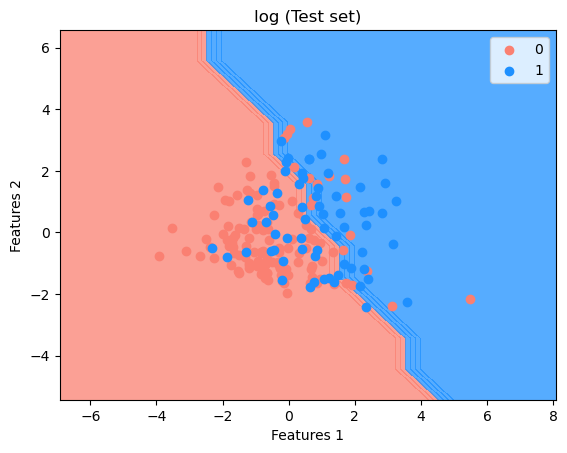

In [55]:
# Logistic Regression (Test set)
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_pca), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 3, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 3, stop = X_set[:, 1].max() + 3, step = 1))
plt.contourf(X1, X2, classifierlog.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('log (Test set)')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.legend()
plt.show()

K-NN Evalaion 

K-NN Report

In [59]:
#predicts classifiers 
#creats a report
y_pred_knn = classifierknn.predict(X_test_pca)
print(classification_report(y_test, y_pred_knn,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.68      0.88      0.77       126
    diabetes       0.48      0.21      0.29        66

    accuracy                           0.65       192
   macro avg       0.58      0.55      0.53       192
weighted avg       0.61      0.65      0.61       192



K-NN Matrix

[[111  15]
 [ 52  14]]


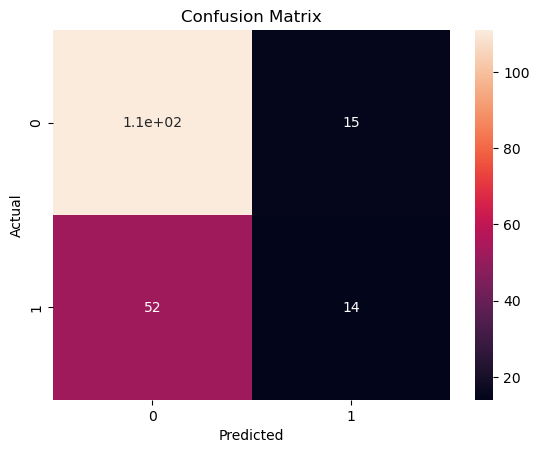

In [61]:
# create a matrix
confusion3 = confusion_matrix(y_test, y_pred_knn)
confusion_df = pd.DataFrame(confusion3, index=range(2),columns=range(2))
import seaborn as sns
print(confusion3)
axes = sns.heatmap(confusion_df, annot=True,)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix")
plt.show()


K-NN visulizer

C:\Users\lokes\AppData\Local\Temp\ipykernel_8744\580007032.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


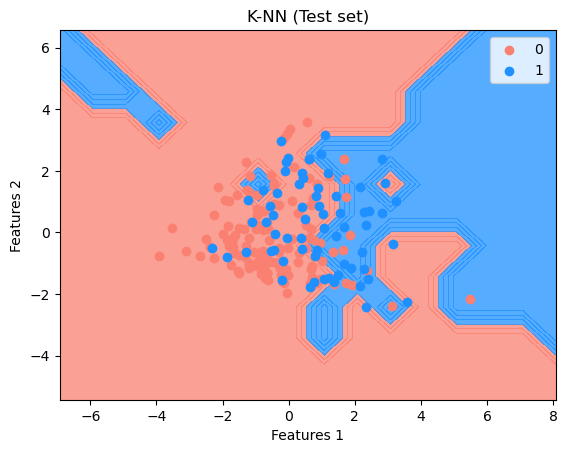

In [63]:
# K-NN (Test set)
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_pca), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 3, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 3, stop = X_set[:, 1].max() + 3, step = 1))
plt.contourf(X1, X2, classifierknn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.legend()
plt.show()

SVM evalutaion

SVM Report

In [67]:
#predicts classifiers 
#creats a report
y_pred_svc = classifiersvc.predict(X_test_pca)
print(classification_report(y_test,y_pred_svc,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.76      0.87      0.81       126
    diabetes       0.65      0.48      0.56        66

    accuracy                           0.73       192
   macro avg       0.71      0.67      0.68       192
weighted avg       0.72      0.73      0.72       192



SVM Mattrix

[[109  17]
 [ 34  32]]


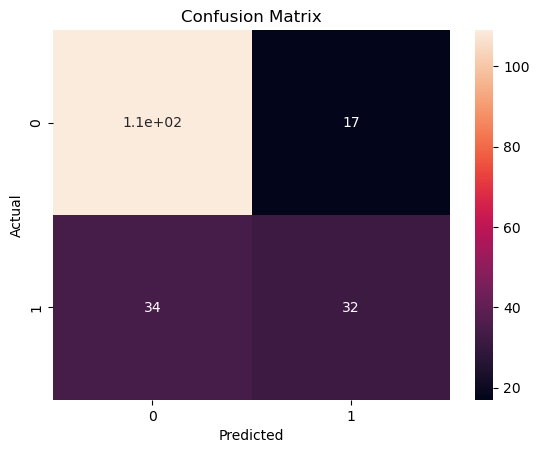

In [69]:
# create a matrix
confusion4 = confusion_matrix(y_test, y_pred_svc)
confusion_df4 = pd.DataFrame(confusion4, index=range(2),columns=range(2))
import seaborn as sns
print(confusion4)
axes = sns.heatmap(confusion_df4, annot=True,)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix")
plt.show()


C:\Users\lokes\AppData\Local\Temp\ipykernel_8744\3577275704.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


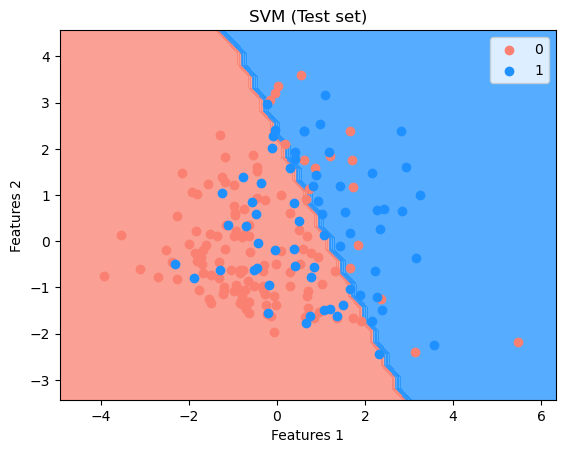

In [70]:
#SVM (Training set)
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_pca), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifiersvc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.legend()
plt.show()

Kernel SVM evaluation 

Kernel SVM report

In [164]:
#predicts classifiers 
#creats a report
y_pred_svc2 = classifiersv2.predict(X_test_pca)
print(classification_report(y_test, y_pred_svc2,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.76      0.90      0.82       126
    diabetes       0.70      0.45      0.55        66

    accuracy                           0.74       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.74      0.74      0.73       192



Kernel SVM matrix

[[113  13]
 [ 36  30]]


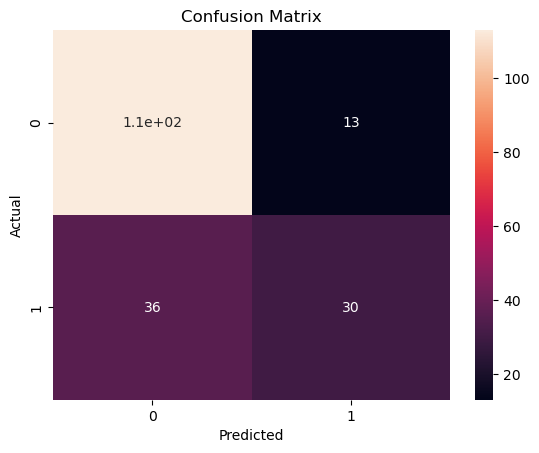

In [166]:
# create a matrix
confusion5 = confusion_matrix(y_test, y_pred_svc2)
confusion_df5 = pd.DataFrame(confusion5, index=range(2),columns=range(2))
import seaborn as sns
print(confusion5)
axes = sns.heatmap(confusion_df5, annot=True,)
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix")
plt.show()

Kernel SVM visulizer

C:\Users\lokes\AppData\Local\Temp\ipykernel_8744\2039785974.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


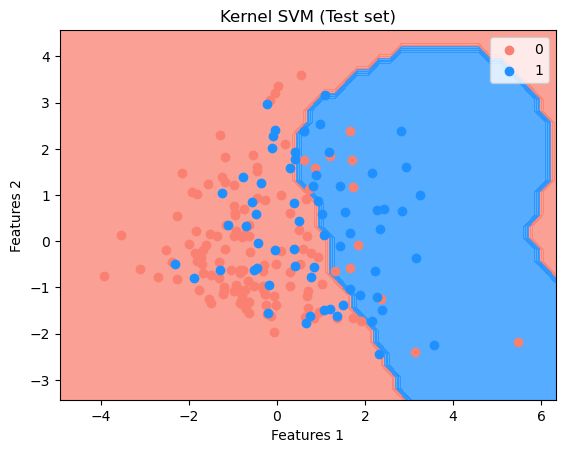

In [78]:
#Kernel SVM (Test set
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_pca), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifiersv2.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.legend()
plt.show()

Naive Bayes evaluation 

Naive Bayes report

In [172]:
#predicts classifiers 
#creats a report
y_pred_nb = classifiernb.predict(X_test_pca)
print(classification_report(y_test, y_pred_nb,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.76      0.87      0.81       126
    diabetes       0.67      0.48      0.56        66

    accuracy                           0.74       192
   macro avg       0.72      0.68      0.69       192
weighted avg       0.73      0.74      0.73       192



Naive Bayes confusion matrix

[[110  16]
 [ 34  32]]


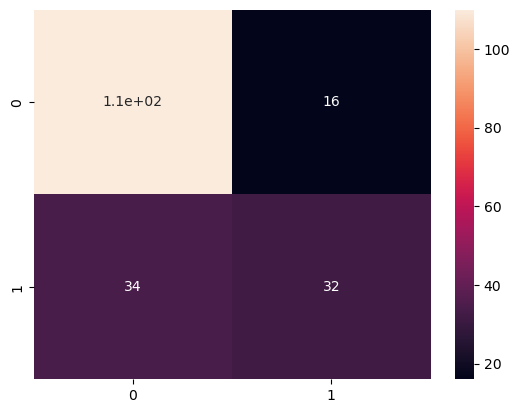

In [84]:
# create a matrix
confusion = confusion_matrix(y_test, y_pred_nb)
confusion_df = pd.DataFrame(confusion, index=range(2),columns=range(2))
import seaborn as sns
print(confusion)
axes = sns.heatmap(confusion_df, annot=True,)

Naive Bayes visulizer

C:\Users\lokes\AppData\Local\Temp\ipykernel_8744\1634599771.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


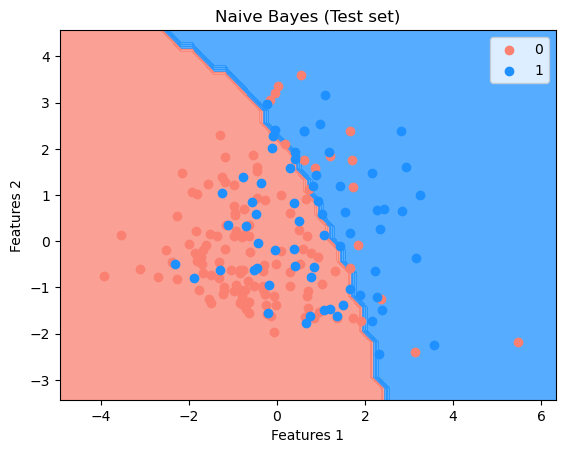

In [86]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_pca), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifiernb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.legend()
plt.show()

Decision Tree  evaluation 

Decision Tree report

In [178]:
#predicts classifiers 
#creats a report
y_pred_dt = classifierdt.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.70      0.71      0.70       126
    diabetes       0.43      0.42      0.43        66

    accuracy                           0.61       192
   macro avg       0.57      0.57      0.57       192
weighted avg       0.61      0.61      0.61       192



Decision Tree confusion matrix

[[89 37]
 [38 28]]


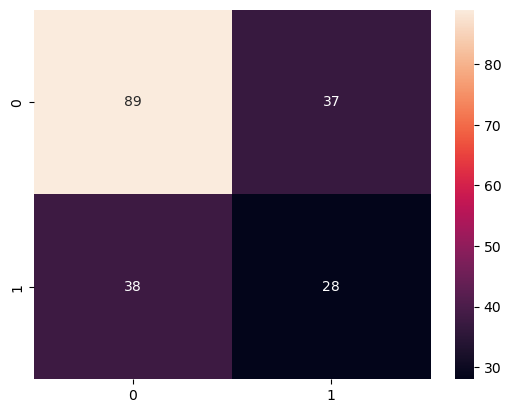

In [92]:
# create a matrix
confusion6 = confusion_matrix(y_test, y_pred_dt)
confusion_df = pd.DataFrame(confusion6, index=range(2),columns=range(2))
import seaborn as sns
print(confusion6)
axes = sns.heatmap(confusion_df, annot=True,)

Decision Tree visulizer

C:\Users\lokes\AppData\Local\Temp\ipykernel_8744\3008149353.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


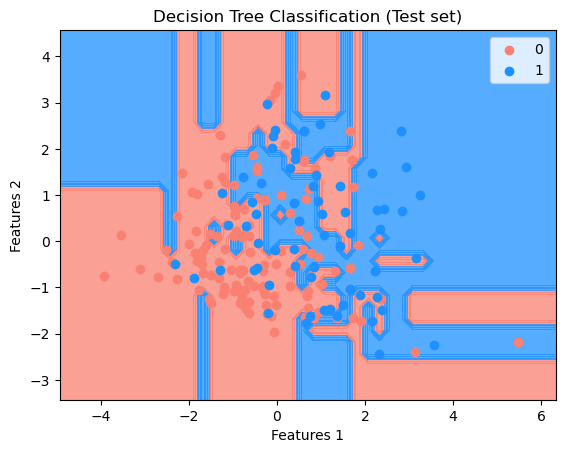

In [94]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_pca), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifierdt.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.legend()
plt.show()

Random Forest  evaluation 

Random Forest  report

In [98]:
#predicts classifiers 
#creats a report
y_pred_rfc = classifierrfc.predict(X_test_pca)
print(classification_report(y_test, y_pred_rfc,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.73      0.84      0.78       126
    diabetes       0.57      0.39      0.46        66

    accuracy                           0.69       192
   macro avg       0.65      0.62      0.62       192
weighted avg       0.67      0.69      0.67       192



Random Forest  confusion matrix

[[106  20]
 [ 40  26]]


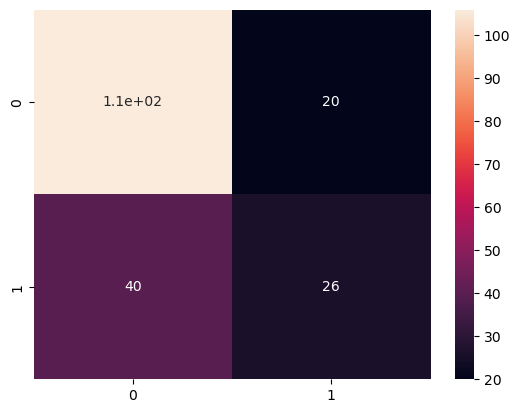

In [100]:
# create a matrix
confusion7 = confusion_matrix(y_test, y_pred_rfc)
confusion_df7 = pd.DataFrame(confusion7, index=range(2),columns=range(2))
import seaborn as sns
print(confusion7)
axes = sns.heatmap(confusion_df7, annot=True,)

Random Forest  visulizer

C:\Users\lokes\AppData\Local\Temp\ipykernel_8744\1195892878.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


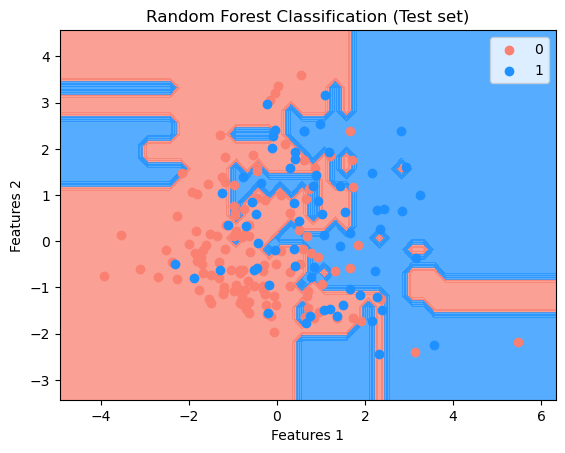

In [102]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test_pca), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.25))
plt.contourf(X1, X2, classifierrfc.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.legend()
plt.show()

ANN  evaluation 

ANN  report

In [105]:
#predicts classifiers 
#creats a report
y_pred_ann = ann.predict(X_test)
print(y_pred_ann)
y_pred_ann = (y_pred_ann > 0.5)
print(classification_report(y_test, y_pred_ann,target_names=names))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0.44418764]
 [0.4818607 ]
 [0.45170605]
 [0.47209975]
 [0.4735548 ]
 [0.4818607 ]
 [0.47446617]
 [0.5574764 ]
 [0.58050036]
 [0.47171003]
 [0.4647101 ]
 [0.4395526 ]
 [0.44299886]
 [0.46875578]
 [0.44326183]
 [0.4818607 ]
 [0.481036  ]
 [0.478107  ]
 [0.36340934]
 [0.47822005]
 [0.40939885]
 [0.5001513 ]
 [0.58857805]
 [0.5013715 ]
 [0.51288295]
 [0.44007263]
 [0.4818607 ]
 [0.55592746]
 [0.42181173]
 [0.4216155 ]
 [0.4813595 ]
 [0.3964023 ]
 [0.4497015 ]
 [0.43967646]
 [0.46547487]
 [0.5940534 ]
 [0.54675394]
 [0.4702901 ]
 [0.51513606]
 [0.5253827 ]
 [0.5348346 ]
 [0.439356  ]
 [0.4801096 ]
 [0.47446617]
 [0.43286365]
 [0.5948422 ]
 [0.550364  ]
 [0.4637541 ]
 [0.5147221 ]
 [0.45241466]
 [0.45491531]
 [0.46653864]
 [0.41223392]
 [0.4796579 ]
 [0.46864927]
 [0.4435582 ]
 [0.5527298 ]
 [0.30437282]
 [0.4123122 ]
 [0.4793705 ]
 [0.48070204]
 [0.5060193 ]
 [0.4528836 ]
 [0.48676908]
 [0.4665505 ]
 [0.5313048 ]
 [0.4818607 ]
 [0.4818607 ]
 [0.454759

ANN  confusion matrix

[[105  21]
 [ 54  12]]


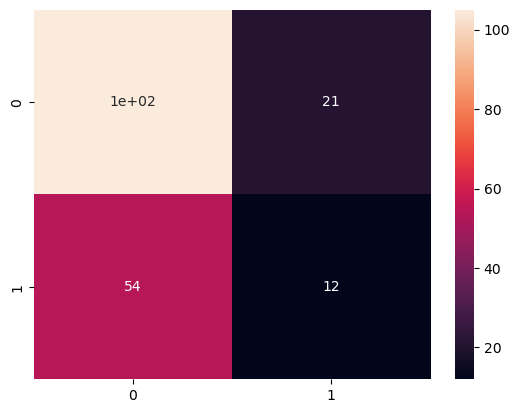

In [107]:
# create a matrix
confusion8 = confusion_matrix(y_test, y_pred_ann)
confusion_df8 = pd.DataFrame(confusion8, index=range(2),columns=range(2))
import seaborn as sns
print(confusion8)
axes = sns.heatmap(confusion_df8, annot=True,)


XGBClassifier evaluation



XGBClassifier report

In [110]:
#predicts classifiers 
#creats a report
y_pred_xg = classifierxg.predict(X_test)
print(classification_report(y_test, y_pred_xg,target_names=names))

              precision    recall  f1-score   support

not diabetes       0.80      0.80      0.80       126
    diabetes       0.62      0.62      0.62        66

    accuracy                           0.74       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



XGBClassifier matrix

[[105  21]
 [ 54  12]]


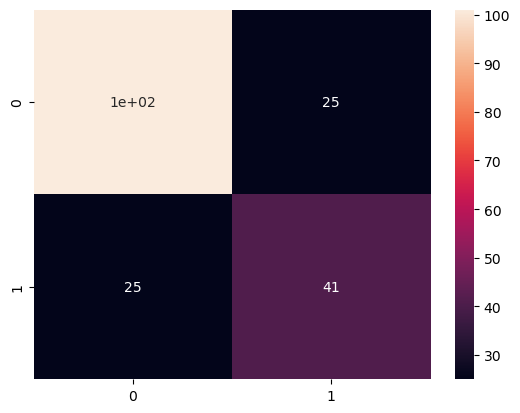

In [112]:
# create a matrix
confusion9 = confusion_matrix(y_test, y_pred_xg)
confusion_df9 = pd.DataFrame(confusion9, index=range(2),columns=range(2))
import seaborn as sns
print(confusion8)
axes = sns.heatmap(confusion_df9, annot=True,)

k fold validation modles

In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score
from sklearn.metrics import recall_score, make_scorer

recall_scorer = make_scorer(recall_score, pos_label=1)


kfold = KFold(n_splits=10,random_state=11,shuffle=True)
# Perform cross-validation
scores1 = cross_val_score(estimator=classifierlog, X=XS, y=y, cv=kfold,scoring=recall_scorer)
scores2 = cross_val_score(estimator=classifierknn, X=XS, y=y, cv=kfold,scoring=recall_scorer)
scores3 = cross_val_score(estimator=classifiersvc, X=XS, y=y, cv=kfold,scoring=recall_scorer)
scores4 = cross_val_score(estimator=classifiersv2, X=XS, y=y, cv=kfold,scoring=recall_scorer)
scores5 = cross_val_score(estimator=classifiernb, X=XS, y=y, cv=kfold,scoring=recall_scorer)
scores6 = cross_val_score(estimator=classifierdt, X=XS, y=y, cv=kfold,scoring=recall_scorer)
scores7 = cross_val_score(estimator=classifierrfc, X=XS, y=y, cv=kfold,scoring=recall_scorer)
scores8 = cross_val_score(estimator=classifierxg, X=XS, y=y, cv=kfold,scoring=recall_scorer)

print(f'precision of LogisticRegression: {scores1.mean():.2%}')
print(f'precision of KNeighborsClassifier: {scores2.mean():.2%}')
print(f'precision of SVC linear : {scores3.mean():.2%}')
print(f'precision of SVC rbf: {scores4.mean():.2%}')
print(f'precision of Gaussin NB: {scores5.mean():.2%}')
print(f'precision of DecisionTree: {scores6.mean():.2%}')
print(f'precision of RandomForest: {scores7.mean():.2%}')
print(f'precision of classifierxg: {scores8.mean():.2%}')
mean = np.mean(cvscores) 
print("precision of ann", mean)


precision of LogisticRegression: 55.82%
precision of KNeighborsClassifier: 34.01%
precision of SVC linear : 55.54%
precision of SVC rbf: 53.85%
precision of Gaussin NB: 59.95%
precision of DecisionTree: 55.64%
precision of RandomForest: 55.31%
precision of classifierxg: 60.07%
precision of ann 21.59544214606285


feature selection

In [116]:
X2 = dataD.iloc[:, 2:8]
X2S = sc.fit_transform(X2)
X3 = dataD.iloc[:, 3:8]
X3S = sc.fit_transform(X3)
X4 = dataD.iloc[:, 4:8]
X4S = sc.fit_transform(X4)
print(X2S)
print(X3S)
print(X4S)

[[ 0.14964075  0.90726993 -0.69289057  0.20401277  0.46849198  1.4259954 ]
 [-0.16054575  0.53090156 -0.69289057 -0.68442195 -0.36506078 -0.19067191]
 [-0.26394125 -1.28821221 -0.69289057 -1.10325546  0.60439732 -0.10558415]
 ...
 [ 0.14964075  0.15453319  0.27959377 -0.73518964 -0.68519336 -0.27575966]
 [-0.47073225 -1.28821221 -0.69289057 -0.24020459 -0.37110101  1.17073215]
 [ 0.04624525  0.65635768 -0.69289057 -0.20212881 -0.47378505 -0.87137393]]
[[ 0.90726993 -0.69289057  0.20401277  0.46849198  1.4259954 ]
 [ 0.53090156 -0.69289057 -0.68442195 -0.36506078 -0.19067191]
 [-1.28821221 -0.69289057 -1.10325546  0.60439732 -0.10558415]
 ...
 [ 0.15453319  0.27959377 -0.73518964 -0.68519336 -0.27575966]
 [-1.28821221 -0.69289057 -0.24020459 -0.37110101  1.17073215]
 [ 0.65635768 -0.69289057 -0.20212881 -0.47378505 -0.87137393]]
[[-0.69289057  0.20401277  0.46849198  1.4259954 ]
 [-0.69289057 -0.68442195 -0.36506078 -0.19067191]
 [-0.69289057 -1.10325546  0.60439732 -0.10558415]
 ...
 [

In [ ]:
feature selection

In [118]:
#splitting the data 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2S, y, test_size = 0.25, random_state = 0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3S, y, test_size = 0.25, random_state = 0)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4S, y, test_size = 0.25, random_state = 0)

In [119]:
#creat modles 

classifierlog_2 = GaussianNB()
classifierlog_2.fit(X2_train, y2_train)
classifierxg2 = XGBClassifier()
classifierxg2.fit(X2_train, y2_train)

classifierlog_3 = GaussianNB()
classifierlog_3.fit(X3_train, y3_train)
classifierxg3 = XGBClassifier()
classifierxg3.fit(X3_train, y3_train)

classifierlog_4 = GaussianNB()
classifierlog_4.fit(X4_train, y4_train)
classifierxg4 = XGBClassifier()
classifierxg4.fit(X4_train, y4_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [120]:
#kfold evalaion

In [121]:
scores3 = cross_val_score(estimator=classifierlog, X=XS, y=y, cv=kfold,scoring='recall')
scores4 = cross_val_score(estimator=classifierxg, X=XS, y=y, cv=kfold,scoring='recall')
print(1)
scores3f2 = cross_val_score(estimator=classifierlog_2, X=X2S, y=y, cv=kfold,scoring='recall')
scores4f2 = cross_val_score(estimator=classifierxg2, X=X2S, y=y, cv=kfold,scoring='recall')
print(2)
scores3f3 = cross_val_score(estimator=classifierlog_3, X=X3S, y=y, cv=kfold,scoring='recall')
scores4f3 = cross_val_score(estimator=classifierxg3, X=X3S, y=y, cv=kfold,scoring='recall')

print(3)
scores3f4 = cross_val_score(estimator=classifierlog_4, X=X4S, y=y, cv=kfold,scoring='recall')
scores4f4 = cross_val_score(estimator=classifierxg4, X=X4S, y=y, cv=kfold,scoring='recall')
print(4)

print(f'precision of log linear : {scores3.mean():.2%}')
print(f'precision of log linear : {scores4.mean():.2%}')
print(f'precision of log features 2 linear : {scores3f2.mean():.2%}')
print(f'precision of log features 2 linear : {scores4f2.mean():.2%}')
print(f'precision of log features 3 linear : {scores3f3.mean():.2%}')
print(f'precision of log features 3 linear : {scores4f3.mean():.2%}')
print(f'precision of log features 4 linear : {scores3f4.mean():.2%}')
print(f'precision of log features 4 linear : {scores4f4.mean():.2%}')

1
2
3
4
precision of log linear : 55.82%
precision of log linear : 60.07%
precision of log features 2 linear : 40.66%
precision of log features 2 linear : 48.63%
precision of log features 3 linear : 37.63%
precision of log features 3 linear : 49.64%
precision of log features 4 linear : 35.40%
precision of log features 4 linear : 51.83%


saving modal

In [123]:
# Once you have your scikit-learn model trained and ready to save, import joblib:
import joblib


# Save the model as a pickle in a file
# You can use the joblib.dump() function. Provide the model and the file path where you want to save it:
joblib.dump(classifierxg, 'filename.pkl')

# Load the model from the file
# Your scikit-learn model is now saved to the specified file with the ".pkl" extension.
# To load the model at a later time for use, you can use joblib.load():
clf_from_joblib = joblib.load('filename.pkl')

# Use the loaded model to make predictions
clf_from_joblib.predict(XS)

# This process allows you to save and load scikit-learn models efficiently, preserving their state for future use without the need to retrain them.

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,